# Part I - (Dataset Exploration Title)
## by Lekan Adenusi

## Introduction
The dataset used in this project is the Prosper Loan Data, provided by Udacity. This data 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the dataset
loan_df = pd.read_csv('../prosperLoanData.csv',)

In [3]:
# Display the shape of the data
print('Dataset shape: {} rows and {} columns'.format(*loan_df.shape))

Dataset shape: 113937 rows and 81 columns


In [4]:
# Print Datatypes
set(loan_df.dtypes)

{dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')}

In [5]:
loan_df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20 0

In [74]:
loan_df.isnull().sum()

ListingKey                                 0
ListingNumber                              0
ListingCreationDate                        0
CreditGrade                            84113
Term                                       0
LoanStatus                                 0
ClosedDate                             57990
BorrowerAPR                               25
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29084
EstimatedLoss                          29084
EstimatedReturn                        29084
ProsperRating (numeric)                29084
ProsperRating (Alpha)                  29084
ListingCategory (numeric)                  0
BorrowerState                           5515
Occupation                              3529
EmploymentStatus                        2255
EmploymentStatusDuration                7625
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
GroupKey  

In [20]:
# Let us check whether there are no duplicate values
loan_df.duplicated().sum()

0

In [73]:
loan_df.shape

(113066, 81)

According to WikiPedia, Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry. Prosper Funding LLC, one of its subsidiaries, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money

### What is the structure of your dataset?
The Prosper Loan data contains over 113,000 records of loans with 81 attributes for each record. From preliminary wrangling, all the null values in the data appear for relevant reasons and do not need to be cleaned/imputed except when requied. 

### What is/are the main feature(s) of interest in your dataset?

My main features of interest are the Borrower APR (Annual Percentage Rate) and the LoanStatus. Concretely, are there certain features or patterns that affect the Borrower APR? What features greatly contribute to the eventual status of the loan?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Going on, I think the Original loan amount, number of investors (or lenders), borrower rate, the borrower's qualities as regards whether they are a home owner or not, their occupation, employment status, and even more features, would be invaluable to my investigation.

In [5]:
categorical_prosper_rating = pd.CategoricalDtype(categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)
categorical_term = pd.CategoricalDtype(categories=[60, 36, 12], ordered=True)

loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(categorical_prosper_rating)
loan_df['Term'] = loan_df['Term'].astype(categorical_term)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

In [6]:
# set one color to use when we do not need seaborn's multiple colors in the plot
sns_color = sns.color_palette()[0]

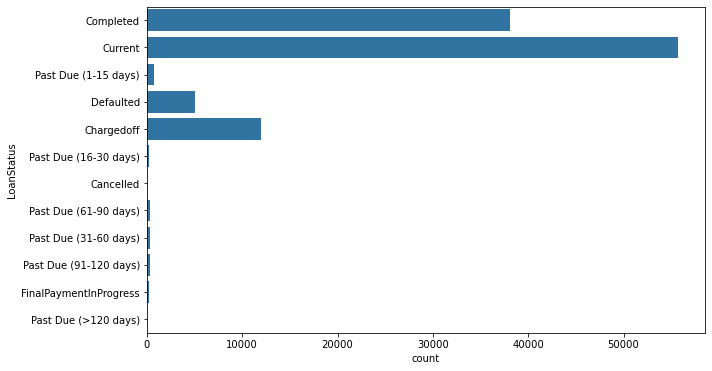

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, y='LoanStatus', color=sns_color);

Since I am particularly interested in the outcome of the loan status, it might be helpful to actually subset the data so that current loan statuses are filtered out. Then, we can focus on those loan statuses that have either been already completed or not. 

In [78]:
loan_df.BorrowerAPR.describe()

count    113041.000000
mean          0.218980
std           0.080483
min           0.006530
25%           0.156290
50%           0.209840
75%           0.283860
max           0.512290
Name: BorrowerAPR, dtype: float64

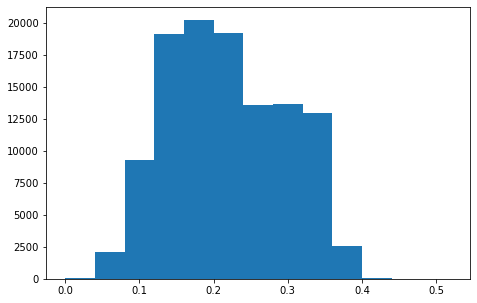

In [80]:
fig, ax = plt.subplots(figsize=(7.6, 5))

bins = np.arange(0, 0.53, 0.04)
ax.hist(loan_df['BorrowerAPR'], bins=bins);

The Borrower Annual Percentage Rate (APR henceforth) almost follows a normal distribution. There is nothing particularly unusual about this except that I think an annual percentage rate of around 0.5 is quite high, which implies that in some cases, the interest on the loan increases by 50% of the original loan amount each year! There might be some interesting relationships waiting to be uncovered as we move on.

In [16]:
normalized_count_of_emp_status = loan_df['EmploymentStatus'].value_counts(normalize=True).reset_index()

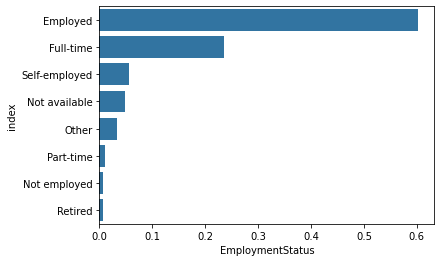

In [17]:
sns.barplot(data=normalized_count_of_emp_status, x='EmploymentStatus', y='index', color=sns_color);

Majority of the borrowers are employed. Concretely, Employed people constitute **60%** of the borrowers. This makes sense, since anyone opting for a loan, should in theory, have some means to pay it back. Retirees and unemployed persons form only **1.4%** of this population.

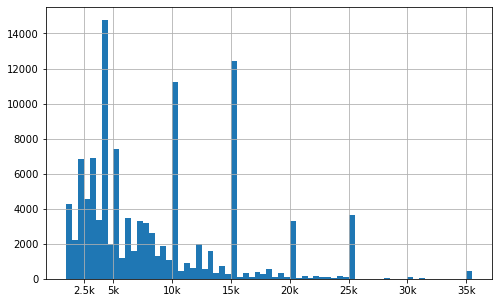

In [25]:
plt.figure(figsize=(8, 5))
bins = np.arange(1000, 36000, 500)
loan_df['LoanOriginalAmount'].hist(bins=bins)

plt.xticks([2.5e3, 5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3], ['2.5k', '5k', '10k', '15k', '20k', '25k', '30k', '35k']);

The spikes in the histogram reveal that most loans are usually procured in multiples of 5,000. Thus, it is more likely to come across a loan amount of $15,000 than it is to come across 12000 USD.

<AxesSubplot:>

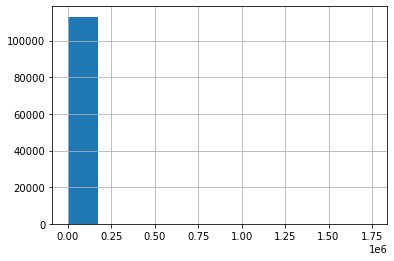

In [113]:
loan_df['StatedMonthlyIncome'].hist()

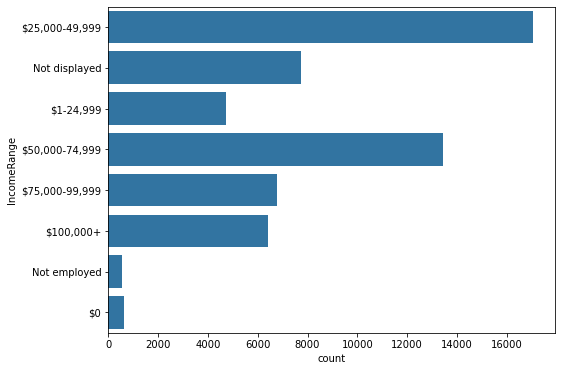

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=loan_df, y='IncomeRange', color=sns_color, ax=ax);

Most of the borrowers earn between 25k to 75k USD; a good number of them also earn more than this. This is consistent what what we saw earlier that a large proportion of the borrowers are employed. Relatively few are unemployed and earn nothing. This discovery begins to motivate the question that why do are people who earn over 100k USD still applying for loans?

<AxesSubplot:>

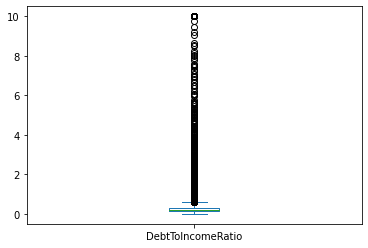

In [111]:
loan_df['DebtToIncomeRatio'].plot(kind='box')

In [132]:
loan_df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [45]:
loan_statuses_of_interest = ['Completed', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff', 'Past Due (16-30 days)',
                            'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)',
                             'FinalPaymentInProgress', 'Past Due (>120 days)']

In [46]:
loan_df = loan_df.loc[loan_df['LoanStatus'].isin(loan_statuses_of_interest), :]

In [48]:
loan_df['LoanStatus'] = loan_df['LoanStatus'].replace({'Past Due (1-15 days)': 'Past Due (1-30 days)', 
                                   'Past Due (16-30 days)': 'Past Due (1-30 days)', 
                                   'Past Due (31-60 days)': '1 Month & Above',
                                   'Past Due (61-90 days)': '1 Month & Above',
                                   'Past Due (91-120 days)': '1 Month & Above',
                                   'Past Due (>120 days)': '1 Month & Above'})

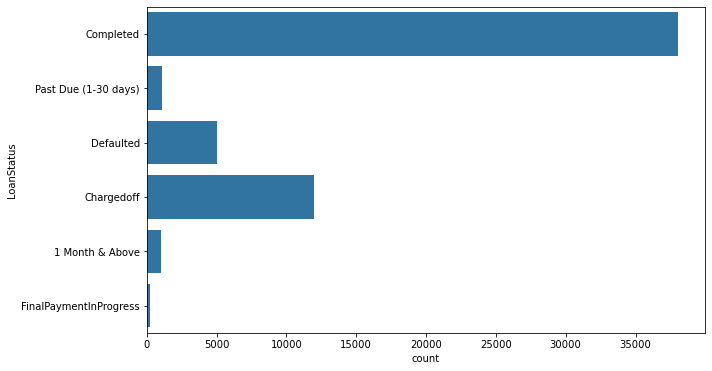

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, y='LoanStatus', color=sns_color);



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [95]:
loan_df['MonthlyLoanPayment'].describe()

count    113066.000000
mean        271.932742
std         192.549979
min           0.000000
25%         130.950000
50%         217.370000
75%         370.570000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

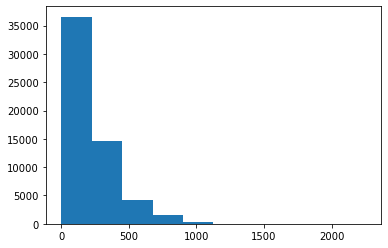

In [50]:
fig, ax = plt.subplots()

plt.hist(loan_df['MonthlyLoanPayment']);

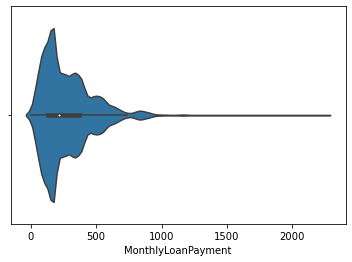

In [27]:
sns.violinplot(data=loan_df, x='MonthlyLoanPayment');

In [58]:
loan_df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

Loan terms are usually for 1, 3, or 5 years, and I strongly believe this would be dependent on how much is being loaned out. In fact, I begin to hypothesize that loan terms play a role in the outcome of the loan's status. It could be that a borrower who is still unable to pay a loan after 5 years is more likely to default than one whose loan term is just a year. 

In [60]:
loan_df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [59]:
loan_df['PercentFunded'].describe()

count    113937.000000
mean          0.998584
std           0.017919
min           0.700000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.012500
Name: PercentFunded, dtype: float64

In [61]:
loan_df['InvestmentFromFriendsCount'].describe()

count    113937.000000
mean          0.023460
std           0.232412
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          33.000000
Name: InvestmentFromFriendsCount, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Let's explore the relationship between the APR and the ProsperRating. Recall that the order of the Prosper Rating, from good to bad is: **AA > A > B > C > D > E > HR**

In [109]:
features_of_interest = ['BorrowerAPR', 'AmountDelinquent', 'Term', 'ProsperScore', 'MonthlyLoanPayment']

pair_features = loan_df[features_of_interest]

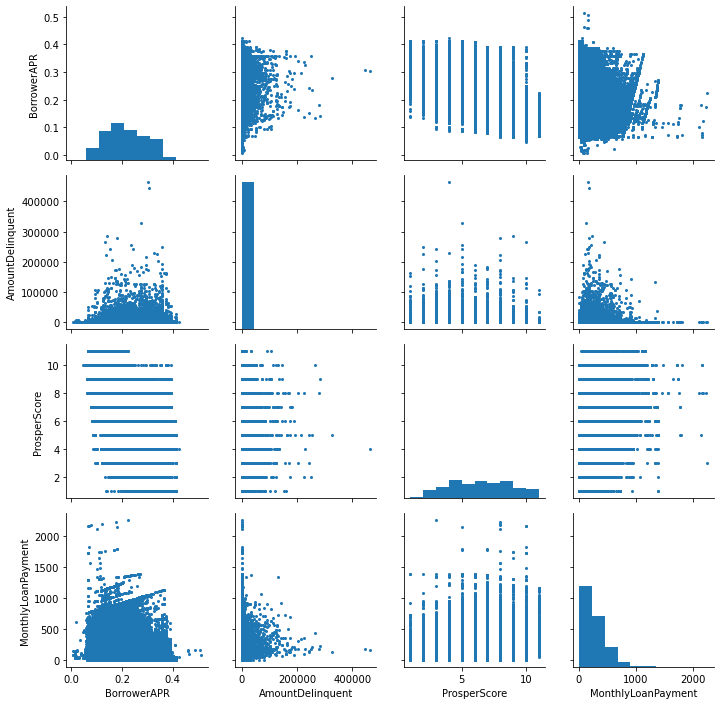

In [111]:
pair_grid = sns.PairGrid(pair_features)
pair_grid.map_diag(plt.hist)
pair_grid.map_offdiag(plt.scatter, s=4)

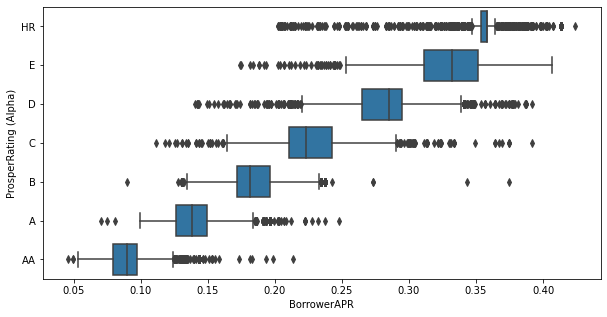

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(y='ProsperRating (Alpha)', x='BorrowerAPR', data=loan_df, ax=ax, color=sns_color,);

In [99]:
group = (loan_df.groupby(by='ProsperRating (Alpha)')['LoanStatus']
         .value_counts(normalize=True)
         .rename('Proportion')
         .reset_index())

group = group[ group['LoanStatus'].str.contains('Past', regex=False)]

In [102]:
group.sort_values(by=['ProsperRating (Alpha)', 'Proportion'], ascending=[True, False]).groupby(by='ProsperRating (Alpha)')['Proportion'].sum()

ProsperRating (Alpha)
HR    0.041673
E     0.038285
D     0.032016
C     0.026656
B     0.017842
A     0.010583
AA    0.004654
Name: Proportion, dtype: float64

<AxesSubplot:xlabel='Term', ylabel='BorrowerAPR'>

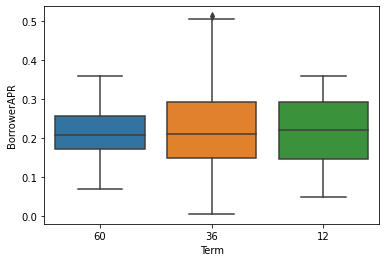

In [107]:
sns.boxplot(data=loan_df, x='Term', y='BorrowerAPR',)

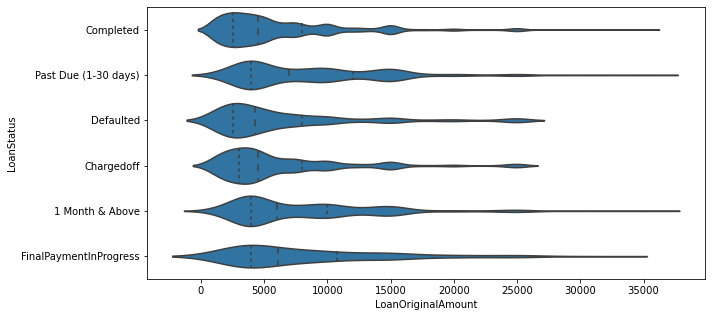

In [142]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(y='LoanStatus', x='LoanOriginalAmount', data=loan_df, ax=ax, inner='quartile', color=sns_color);

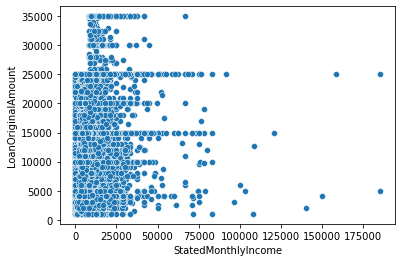

In [117]:
sns.scatterplot(data=loan_df[loan_df['StatedMonthlyIncome'] <= 0.2e6], x='StatedMonthlyIncome', y='LoanOriginalAmount');

<AxesSubplot:xlabel='DebtToIncomeRatio', ylabel='BorrowerAPR'>

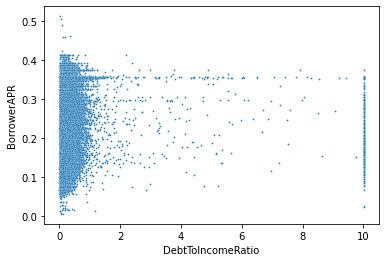

In [112]:
sns.scatterplot(data=loan_df, x='DebtToIncomeRatio', y='BorrowerAPR', s=3)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

